# New Plant Diseases Dataset

## Proje [Linki](https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
train_path = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
test_path = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
valid_path = "/kaggle/input/new-plant-diseases-dataset/test"

In [2]:
"""
/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Tomato___Late_blight/1e5ba644-efeb-4bd3-b878-a0606cf8a992___RS_Late.B 6272_flipLR.JPG
/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Tomato___Late_blight/3dcee9ed-43bb-45a9-8cff-641b3dd62179___RS_Late.B 5324.JPG
/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Tomato___Late_blight/532b2c20-d17b-4b3e-a69e-54a6e5343014___GHLB2 Leaf 9004.JPG
/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Tomato___Late_blight/418ae33c-5f61-4531-82df-8608d82a7a90___RS_Late.B 5574.JPG
"""
import cv2
img = cv2.imread("/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Tomato___Late_blight/1e5ba644-efeb-4bd3-b878-a0606cf8a992___RS_Late.B 6272_flipLR.JPG")
img.shape

(256, 256, 3)

In [3]:
height = 100
width = 100
batch_size = 25
seed = 73

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)
train_dataset = train_datagen.flow_from_directory(train_path,
                                                  target_size=(height, width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  seed=seed,
                                                  color_mode='rgb',
                                                  interpolation='hamming',
                                                  subset='training')

test_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)
test_dataset = test_datagen.flow_from_directory(test_path,
                                                target_size=(height, width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                seed=seed,
                                                color_mode='rgb',
                                                interpolation='hamming',
                                                subset='validation')

Found 56251 images belonging to 38 classes.
Found 3503 images belonging to 38 classes.


In [5]:
test2_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)
test2_dataset = test2_datagen.flow_from_directory(valid_path,
                                                target_size=(height, width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                seed=seed,
                                                color_mode='rgb',
                                                interpolation='hamming',
                                                subset='validation')

Found 6 images belonging to 1 classes.


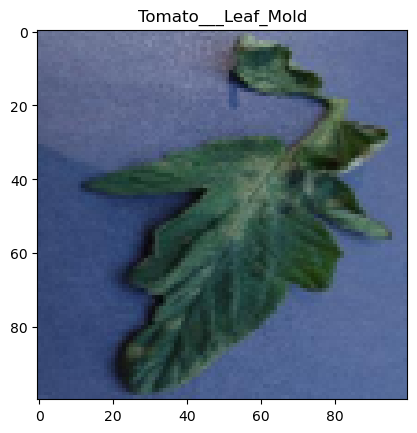

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Veri kümesinden rastgele bir görüntü seçin
image_batch, label_batch = next(iter(train_dataset))

aziz = np.random.randint(len(image_batch)-1, size=1)[0] # rastgele veriye bakmak için

image = image_batch[aziz]
label = label_batch[aziz]

# Sınıf indekslerinden sınıf adlarına dönüştürme
class_names = list(train_dataset.class_indices.keys())
label = class_names[label.argmax()]

# Görüntüyü ve labelleri gösterme
plt.imshow(image)
plt.title(label)
plt.show()

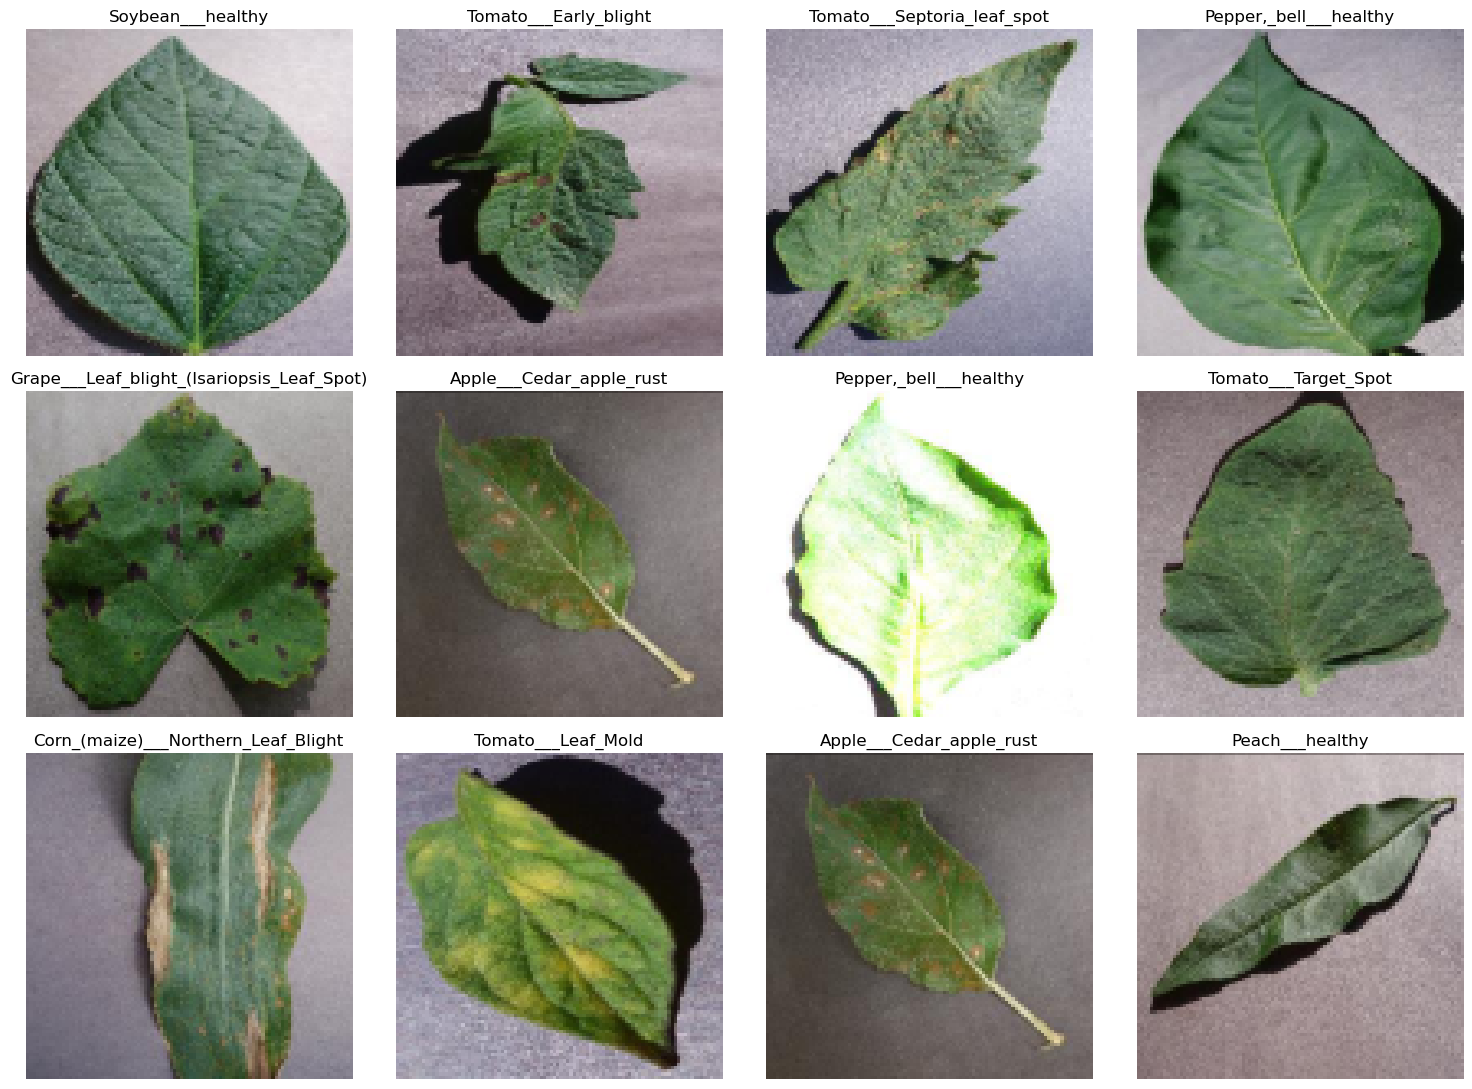

In [8]:
import random as rn
import matplotlib.pyplot as plt
fig,ax = plt.subplots(3,4)
fig.set_size_inches(15,11)
img,y = train_dataset.next()
for i in range(3):
    for j in range (4):
        aziz = rn.randint(0,batch_size-1)
        label = list(train_dataset.class_indices.keys())[np.argmax(y[aziz])]
        ax[i,j].imshow(img[aziz])
        ax[i,j].set_title(label)
        ax[i,j].axis("off")        

plt.tight_layout()

# Derin Öğrenme ve CNN (Convolutional Neural Network)

In [9]:
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [10]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=128, kernel_size=(5,5), activation='relu', input_shape=(height,width,3)),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.25),
    
    keras.layers.Dense(38, activation='softmax') # 38 tür var ondan dense 38 olarak belirledim 
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 128)       9728      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 128)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 128)      0         
 2D)                                                             
                                                        

In [12]:
model.compile(optimizer = "adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [13]:
epochs = 5
history = model.fit(train_dataset, steps_per_epoch=len(train_dataset), epochs=epochs, validation_data=test_dataset, validation_steps=len(test_dataset))

Epoch 1/5
2251/2251 [==============================] - 3321s 1s/step - loss: 1.0668 - accuracy: 0.6938 - val_loss: 1.1934 - val_accuracy: 0.6771
Epoch 2/5
2251/2251 [==============================] - 3331s 1s/step - loss: 0.3974 - accuracy: 0.8765 - val_loss: 0.5804 - val_accuracy: 0.8079
Epoch 3/5
2251/2251 [==============================] - 3364s 1s/step - loss: 0.2560 - accuracy: 0.9193 - val_loss: 1.3428 - val_accuracy: 0.6774
Epoch 4/5
2251/2251 [==============================] - 3332s 1s/step - loss: 0.1851 - accuracy: 0.9406 - val_loss: 0.2219 - val_accuracy: 0.9298
Epoch 5/5
2251/2251 [==============================] - 3273s 1s/step - loss: 0.1455 - accuracy: 0.9527 - val_loss: 0.7322 - val_accuracy: 0.7947


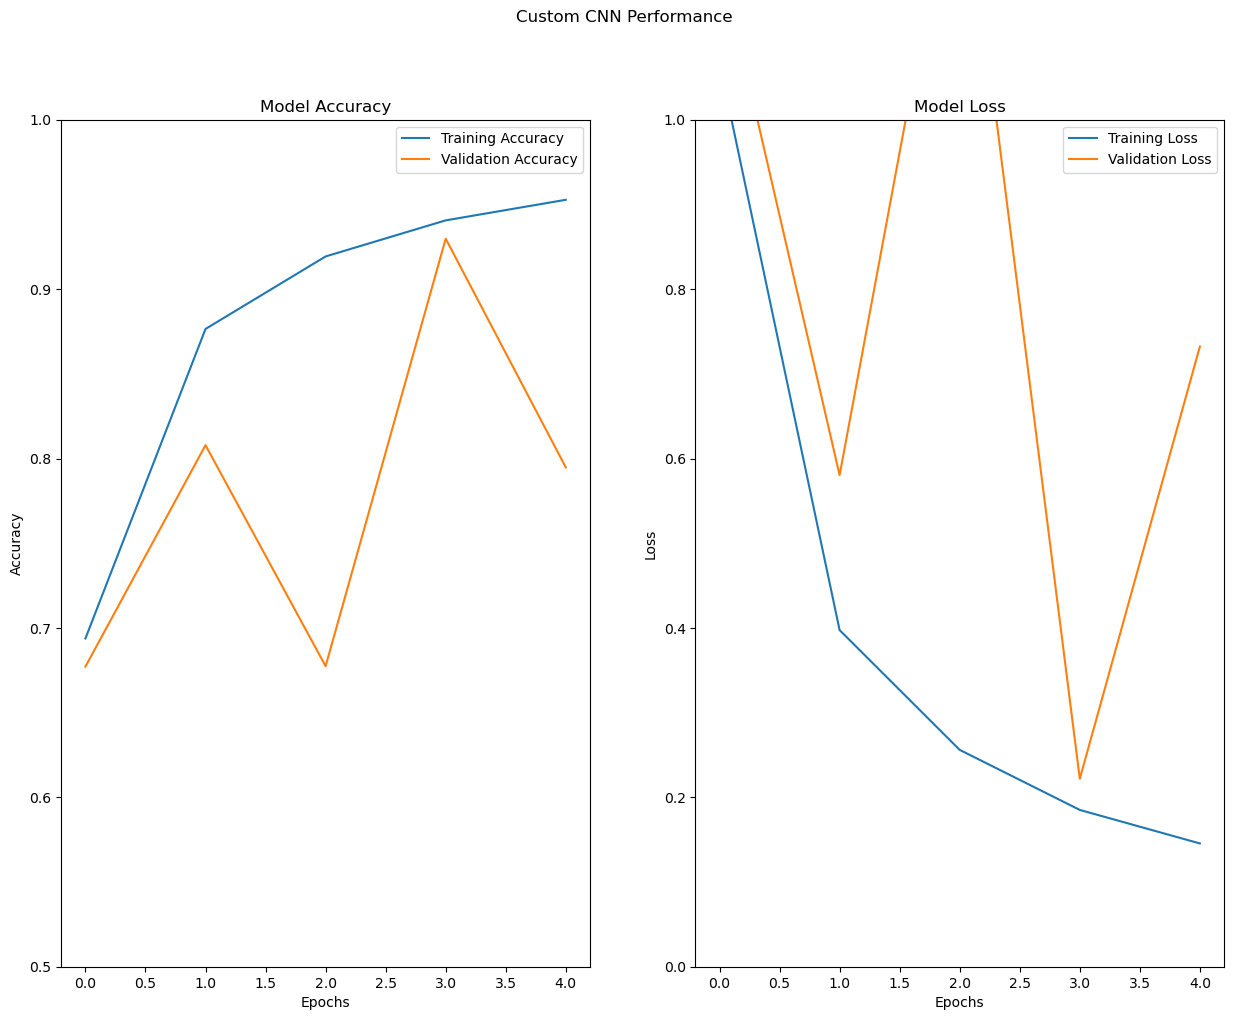

<Figure size 1000x700 with 0 Axes>

In [15]:
import pandas as pd
fig,ax=plt.subplots(1,2)
fig.set_size_inches(15,11)
performance = pd.DataFrame(history.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0,1)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.5,1)
fig.suptitle('Custom CNN Performance')
plt.show()

In [16]:
predictions = model.predict(test_dataset)
predictions = np.argmax(predictions, axis=1)  # En yüksek olasılıklı sınıfın indekslerini alır
predictions = predictions.astype(int)  # int tipine dönüştürür
predictions[:15]

141/141 [==============================] - 57s 400ms/step


array([26, 21, 25, 29, 28, 26, 17, 30, 35,  0,  3, 36,  5, 35, 29])

1/1 [==============================] - 0s 399ms/step


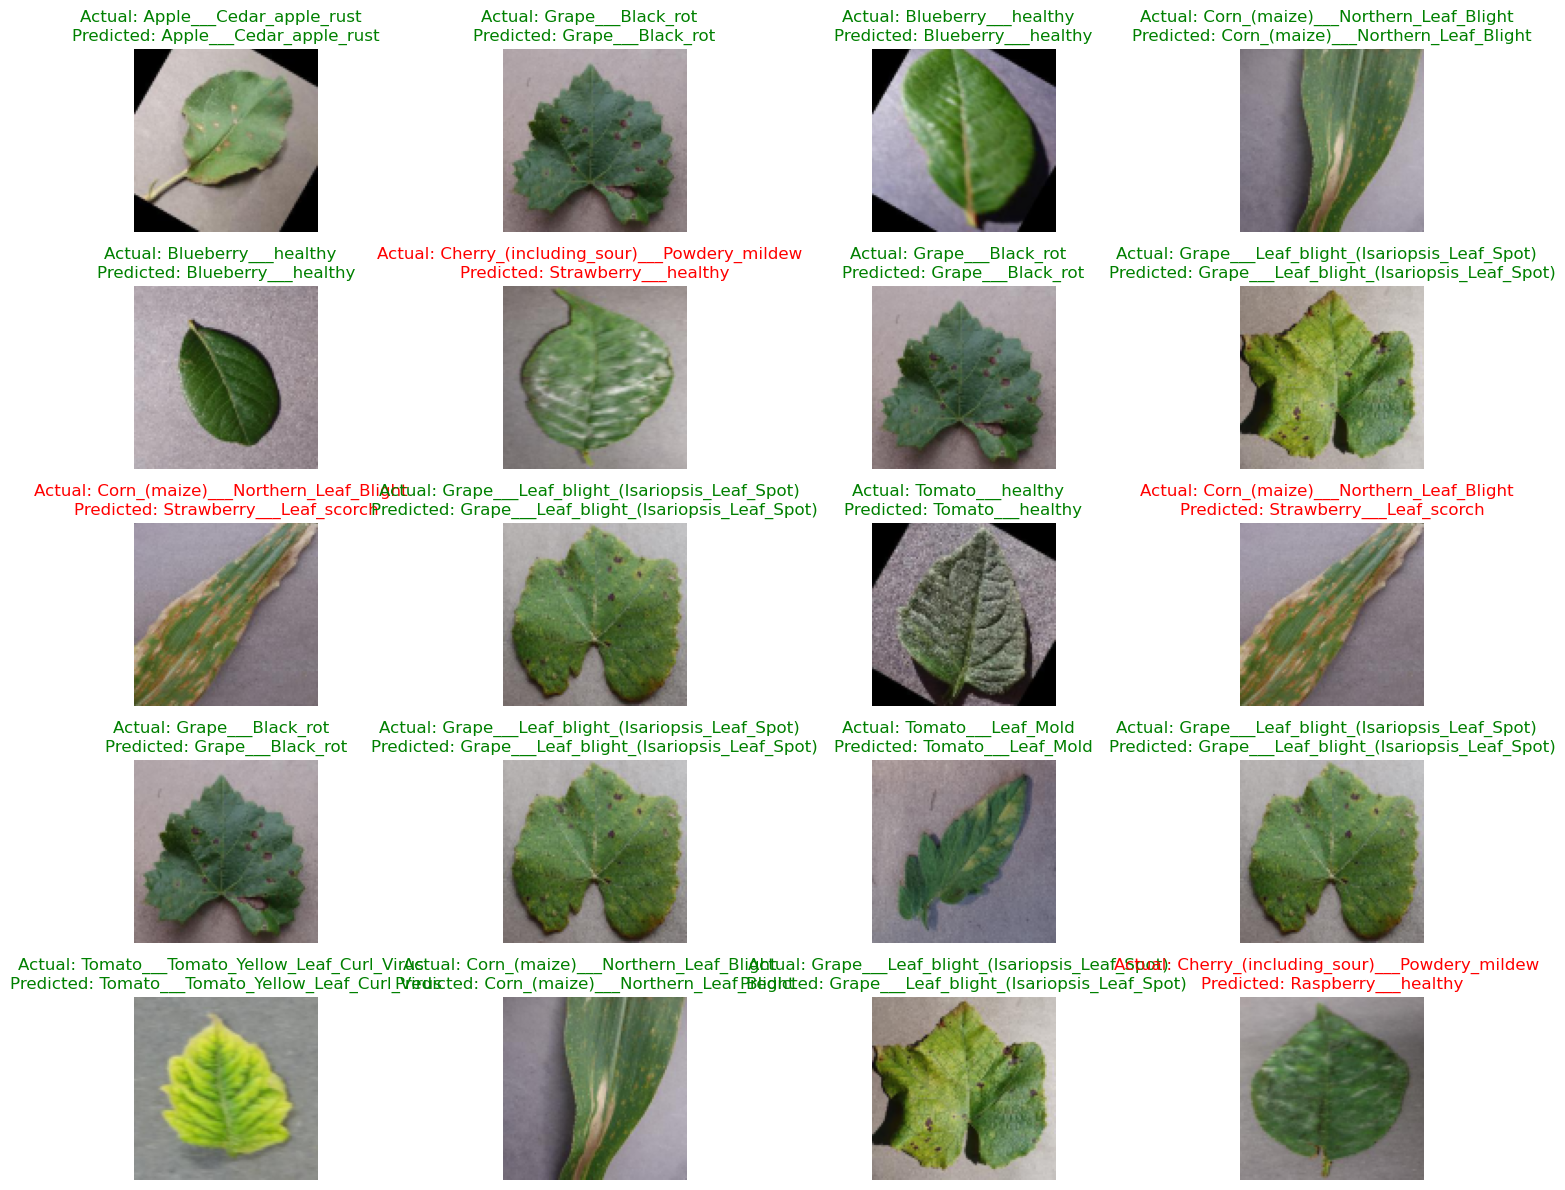

In [32]:
def map_pred(pred):
    return [list(train_dataset.class_indices.keys())[i] for i in pred]

a = 5
b = 4

fig,ax=plt.subplots(a,b)
fig.set_size_inches(16,12)
val_images, val_labels = test_dataset.next()
predicted = model.predict(val_images)
predicts = map_pred(np.argmax(predicted, axis=-1))
labels = map_pred(np.argmax(val_labels, axis=-1))

for i in range(a):
    for j in range (b):
        aziz = rn.randint(0,batch_size-1)
        ax[i,j].imshow(val_images[aziz])
        if labels[aziz] == predicts[aziz]:
            ax[i,j].set_title('Actual: ' + labels[aziz] + '  \nPredicted: ' + predicts[aziz] , color = 'green')
        else: 
            ax[i,j].set_title('Actual: ' + labels[aziz] + '  \nPredicted: ' +  predicts[aziz] , color = 'red')
        ax[i,j].axis("off")

plt.tight_layout()

In [33]:
val_images, val_labels = test2_dataset.next()
val_images[1]

array([[[0.48235297, 0.53333336, 0.65882355],
        [0.4784314 , 0.5294118 , 0.654902  ],
        [0.47450984, 0.5254902 , 0.6509804 ],
        ...,
        [0.45882356, 0.5176471 , 0.6784314 ],
        [0.4666667 , 0.5254902 , 0.6862745 ],
        [0.47450984, 0.53333336, 0.69411767]],

       [[0.4784314 , 0.5294118 , 0.654902  ],
        [0.4784314 , 0.5294118 , 0.654902  ],
        [0.4784314 , 0.5294118 , 0.654902  ],
        ...,
        [0.45882356, 0.5176471 , 0.6784314 ],
        [0.46274513, 0.52156866, 0.68235296],
        [0.45882356, 0.5176471 , 0.6784314 ]],

       [[0.47450984, 0.5254902 , 0.6509804 ],
        [0.4784314 , 0.5294118 , 0.654902  ],
        [0.48235297, 0.53333336, 0.65882355],
        ...,
        [0.47058827, 0.5294118 , 0.6901961 ],
        [0.47058827, 0.5294118 , 0.6901961 ],
        [0.454902  , 0.5137255 , 0.6745098 ]],

       ...,

       [[0.41960788, 0.4784314 , 0.6392157 ],
        [0.41960788, 0.4784314 , 0.6392157 ],
        [0.4039216 , 0

In [34]:
val_labels

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [35]:
predicted = model.predict(val_images)
predicted

1/1 [==============================] - 0s 123ms/step


array([[1.84514229e-05, 3.82829341e-04, 9.29451585e-01, 2.77911823e-07,
        6.59600410e-05, 1.95876487e-06, 1.80944119e-06, 6.06603585e-02,
        9.50273534e-04, 1.32783753e-04, 1.65318704e-06, 1.00201136e-03,
        3.34888115e-03, 1.42375484e-06, 1.75560621e-04, 2.34639437e-08,
        9.48910497e-08, 2.32765643e-07, 2.74659942e-05, 1.03095499e-06,
        3.49104544e-03, 4.57600436e-07, 6.08149207e-07, 9.09465825e-07,
        8.65593756e-06, 5.53874315e-06, 1.23898673e-04, 4.21704635e-06,
        2.74720969e-05, 4.84460870e-05, 1.47963310e-05, 2.85486209e-07,
        4.25989892e-05, 5.11282883e-09, 5.03808799e-08, 1.63434919e-08,
        5.40276346e-07, 5.75181775e-06],
       [8.37649465e-01, 7.91819673e-07, 2.48841911e-06, 1.50458232e-01,
        1.05871033e-04, 4.86188810e-07, 1.57212014e-07, 1.53327972e-04,
        1.41426017e-05, 4.70383293e-06, 1.28329066e-06, 1.30144879e-04,
        2.32184306e-04, 2.29397538e-05, 5.44128973e-08, 1.30150329e-06,
        4.91553394e-04,

In [36]:
predicts = map_pred(np.argmax(predicted, axis=-1))
predicts

['Apple___Cedar_apple_rust',
 'Apple___Apple_scab',
 'Strawberry___healthy',
 'Apple___Cedar_apple_rust',
 'Blueberry___healthy',
 'Apple___Cedar_apple_rust']

In [37]:
labels = map_pred(np.argmax(val_labels, axis=-1))
labels

['Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab',
 'Apple___Apple_scab']

1/1 [==============================] - 0s 107ms/step


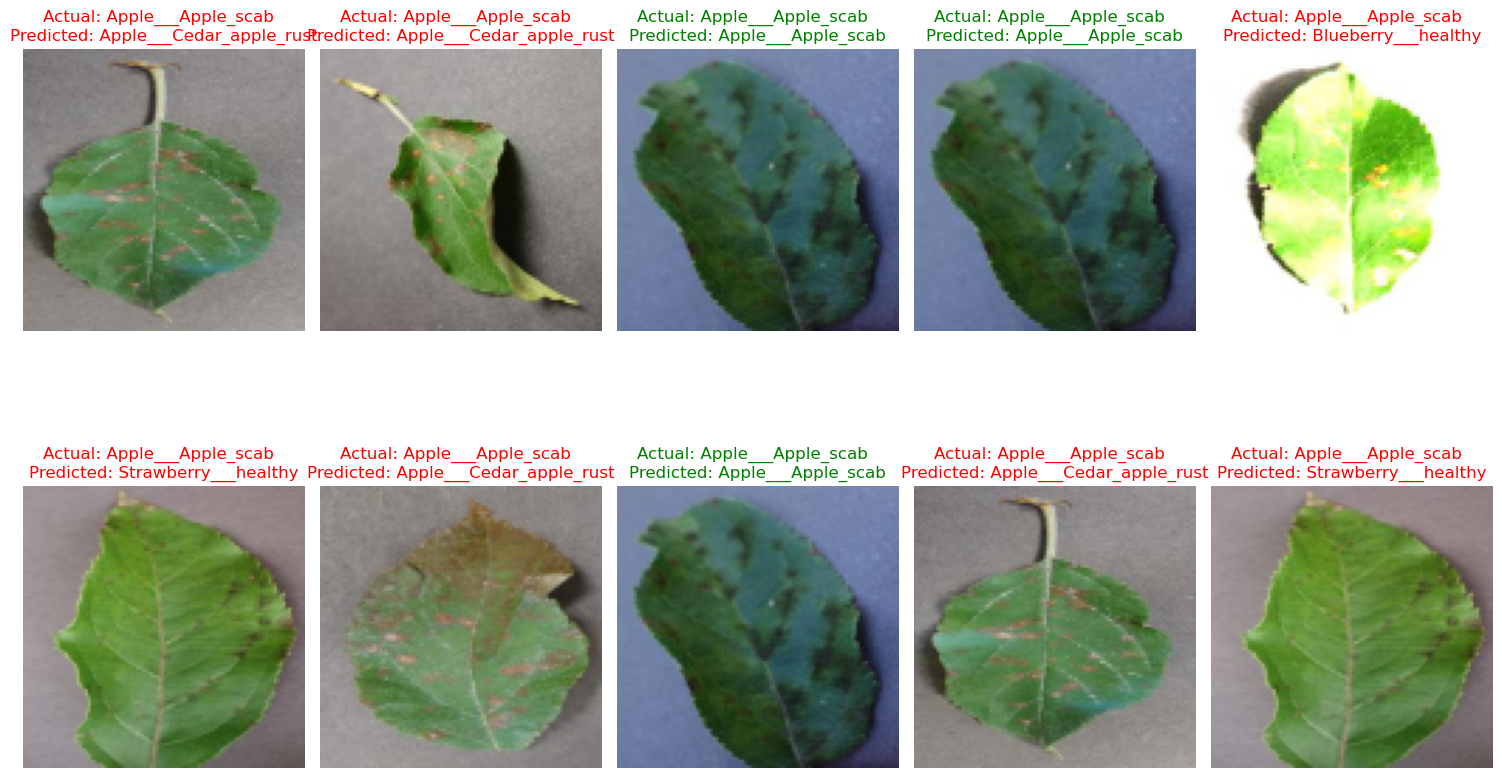

In [52]:
def map_pred(pred):
    return [list(train_dataset.class_indices.keys())[i] for i in pred]

a = 2
b = 5

fig,ax=plt.subplots(a,b)
fig.set_size_inches(15,10)
val_images, val_labels = test2_dataset.next()
predicted = model.predict(val_images)
predicts = map_pred(np.argmax(predicted, axis=-1))
labels = map_pred(np.argmax(val_labels, axis=-1))

for i in range(a):
    for j in range (b):
        aziz = rn.randint(0,len(val_images)-1)
        ax[i,j].imshow(val_images[aziz])
        if labels[aziz] == predicts[aziz]:
            ax[i,j].set_title('Actual: ' + labels[aziz] + '  \nPredicted: ' + predicts[aziz] , color = 'green')
        else: 
            ax[i,j].set_title('Actual: ' + labels[aziz] + '  \nPredicted: ' +  predicts[aziz] , color = 'red')
        ax[i,j].axis("off")

plt.tight_layout()